In [1]:
# ✅ STEP 1: Install dependencies and restart runtime if needed
!pip install --upgrade gensim nltk matplotlib scikit-learn --quiet

In [6]:
# ✅ STEP 2: Import necessary libraries
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import requests
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text.replace("\n", " ")
data = []
for sentence in sent_tokenize(text):
    words = [word.lower() for word in word_tokenize(sentence)]
    data.append(words)

In [8]:
# Train Word2Vec models
cbow_model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, sg=0)
skipgram_model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, sg=1)

In [9]:
print("CBOW - Similarity ('alice', 'wonderland'):", cbow_model.wv.similarity('alice', 'wonderland'))
print("CBOW - Similarity ('alice', 'machines'):", cbow_model.wv.similarity('alice', 'machines'))
print("Skip-Gram - Similarity ('alice', 'wonderland'):", skipgram_model.wv.similarity('alice', 'wonderland'))
print("Skip-Gram - Similarity ('alice', 'machines'):", skipgram_model.wv.similarity('alice', 'machines'))

CBOW - Similarity ('alice', 'wonderland'): 0.98824143
CBOW - Similarity ('alice', 'machines'): 0.9441479
Skip-Gram - Similarity ('alice', 'wonderland'): 0.82562965
Skip-Gram - Similarity ('alice', 'machines'): 0.8508796


In [18]:
import numpy as np

In [19]:
def plot_tsne(model, title):
    labels = []
    tokens = []

    # Collect the top 100 word vectors and labels
    for word in model.wv.index_to_key[:100]:
        tokens.append(model.wv[word])
        labels.append(word)

    # ✅ Convert the list of vectors to a NumPy array
    tokens = np.array(tokens)

    # Apply t-SNE
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500, random_state=42)
    new_values = tsne_model.fit_transform(tokens)

    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    # Plotting
    plt.figure(figsize=(14, 10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()

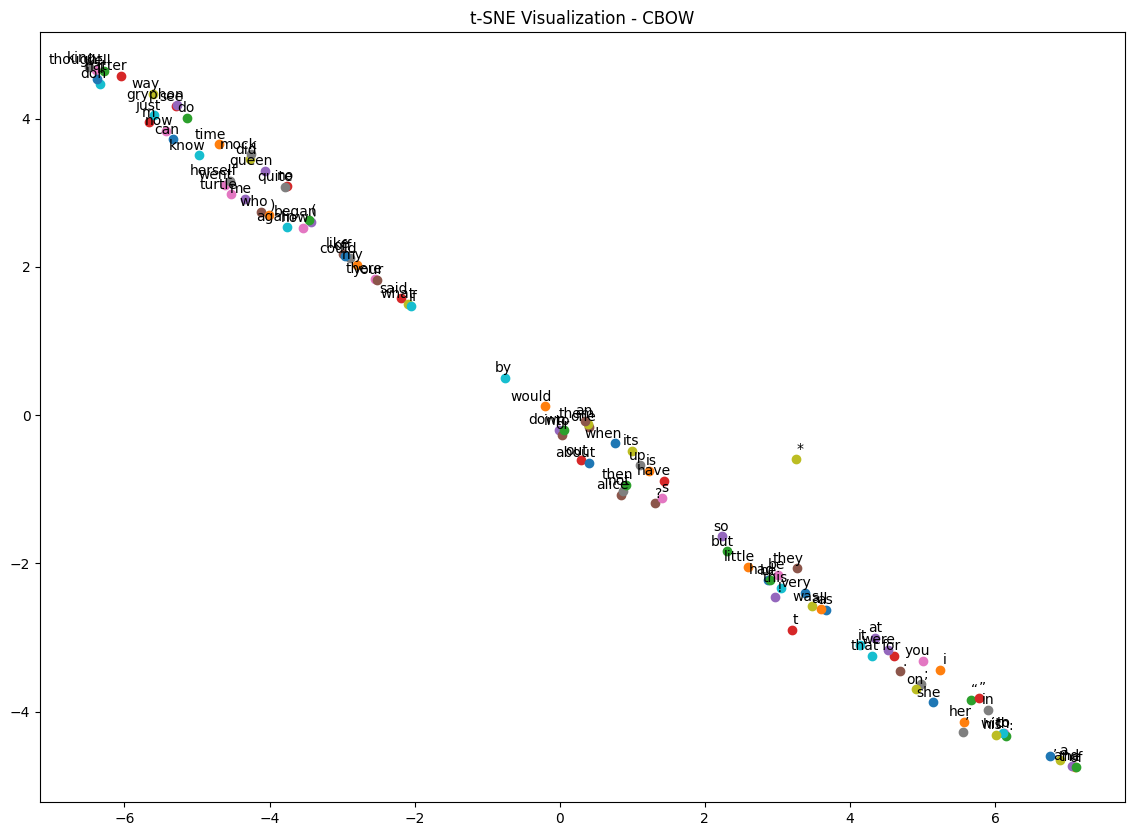

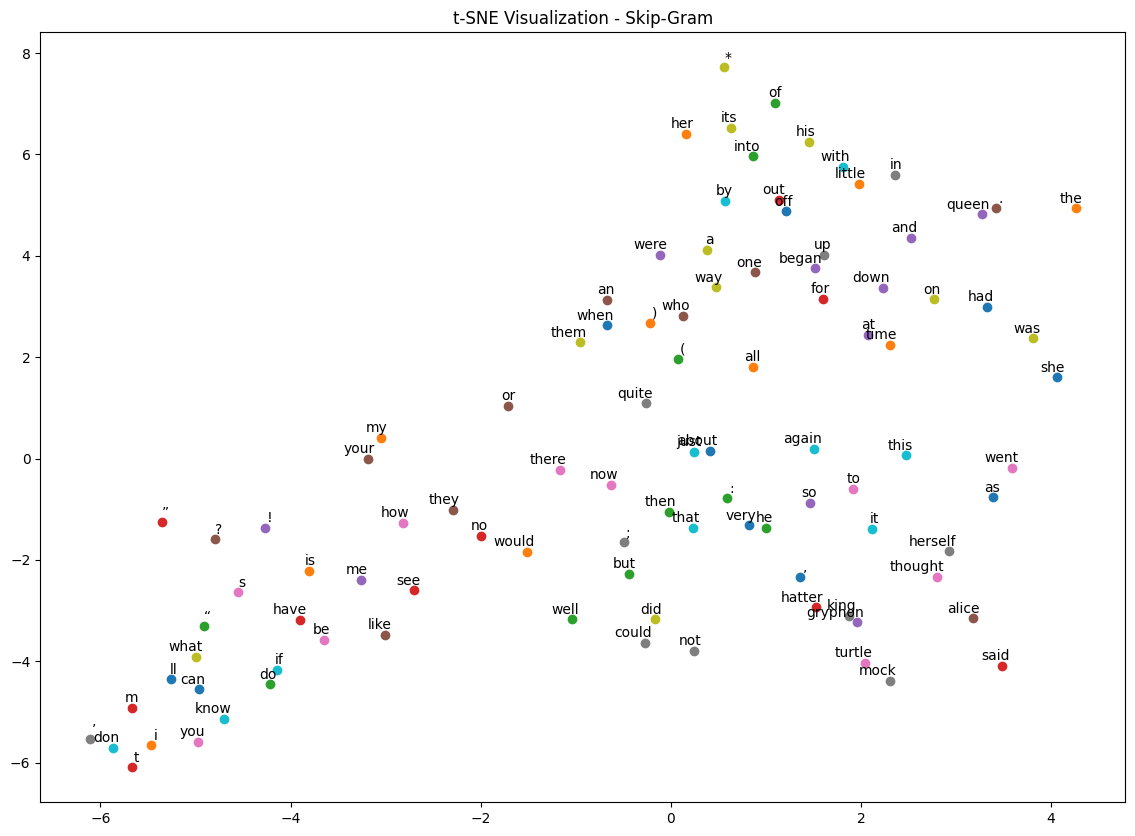

In [21]:
plot_tsne(cbow_model, "t-SNE Visualization - CBOW")
plot_tsne(skipgram_model, "t-SNE Visualization - Skip-Gram")

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stop words
stop_words = set(stopwords.words('english'))

# Apply stop word filtering to each tokenized sentence
filtered_data = []
for sentence in data:
    filtered_sentence = [word for word in sentence if word not in stop_words]
    filtered_data.append(filtered_sentence)

In [23]:
# Train Word2Vec models
cbow_model = Word2Vec(sentences=filtered_data, vector_size=100, window=5, min_count=1, sg=0)
skipgram_model = Word2Vec(sentences=filtered_data, vector_size=100, window=5, min_count=1, sg=1)

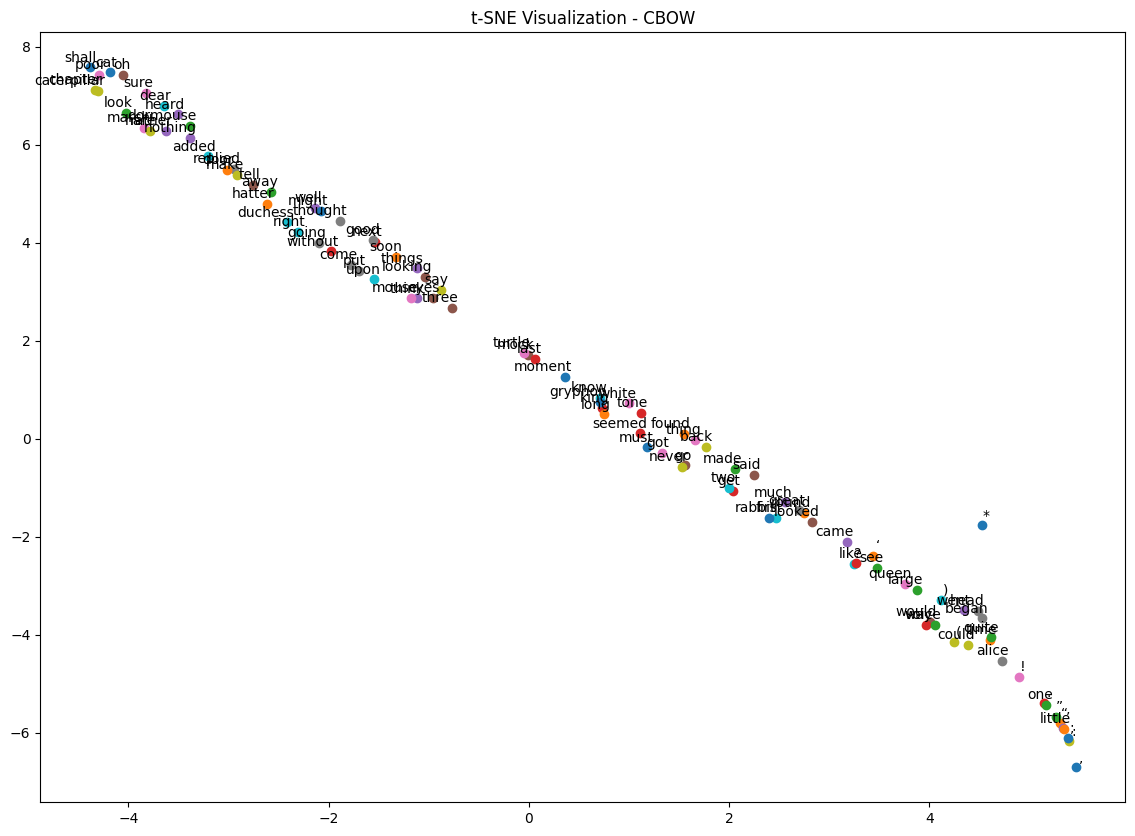

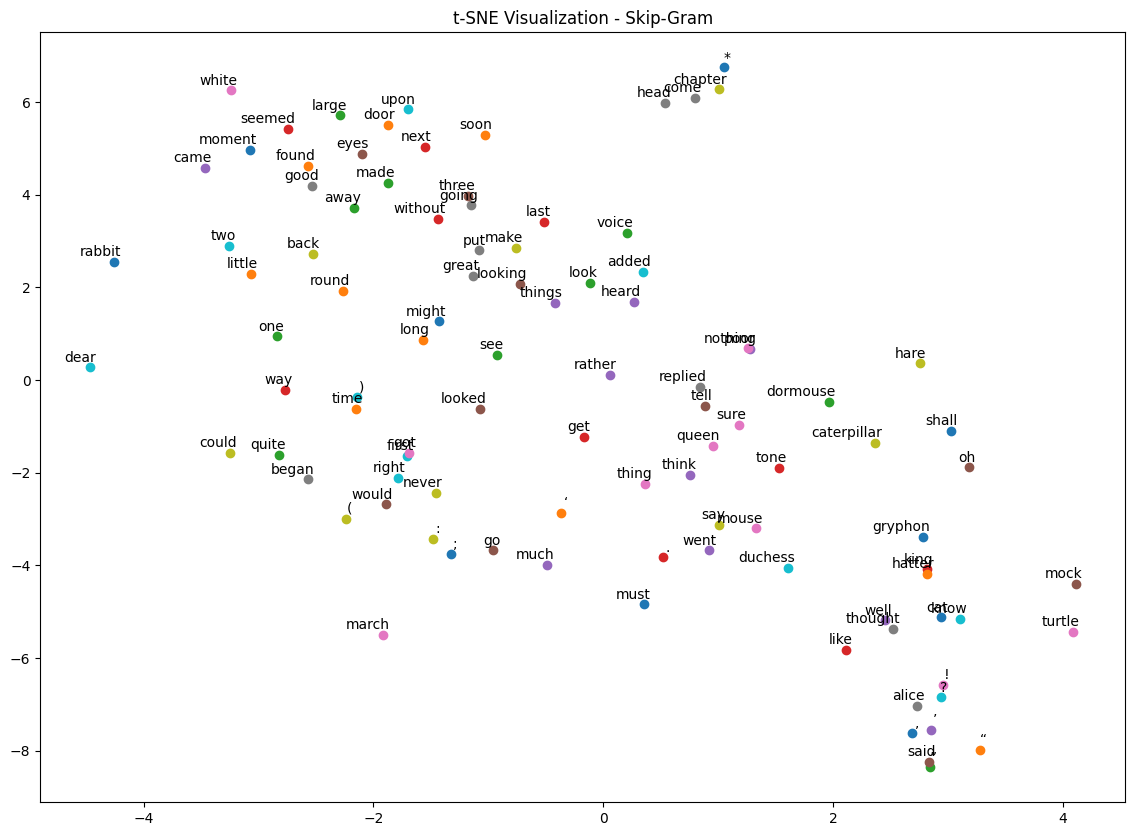

In [24]:
plot_tsne(cbow_model, "t-SNE Visualization - CBOW")
plot_tsne(skipgram_model, "t-SNE Visualization - Skip-Gram")